In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import math
import copy

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools 
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
data = pd.read_csv('Weather_1948-2017.csv')
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
data.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [5]:
data[(data.RAIN != True) & (data.RAIN!=False)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [6]:
data = data[(data.RAIN == True) | (data.RAIN==False)]

In [7]:
labelencoder = LabelEncoder()
data['RAIN'] = labelencoder.fit_transform(data['RAIN'])

In [8]:
data['MONTH'] = pd.DatetimeIndex(data['DATE']).month
data['DAY'] = pd.DatetimeIndex(data['DATE']).day
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN,MONTH,DAY
0,1948-01-01,0.47,51,42,1,1,1
1,1948-01-02,0.59,45,36,1,1,2
2,1948-01-03,0.42,45,35,1,1,3
3,1948-01-04,0.31,45,34,1,1,4
4,1948-01-05,0.17,45,32,1,1,5


In [9]:
data.corr()

,PRCP,TMAX,TMIN,RAIN,MONTH,DAY
PRCP,1.000000,-0.226736,-0.064365,0.515160,0.014918,-0.001339
TMAX,-0.226736,1.000000,0.860675,-0.389241,0.154972,0.001726
TMIN,-0.064365,0.860675,1.000000,-0.139905,0.222504,0.003190
RAIN,0.515160,-0.389241,-0.139905,1.000000,-0.046046,-0.003148
MONTH,0.014918,0.154972,0.222504,-0.046046,1.000000,0.009639
DAY,-0.001339,0.001726,0.003190,-0.003148,0.009639,1.000000


In [10]:
rain = data[data.RAIN == True]
norain = data[data.RAIN == False]

In [11]:
dataN = data.copy()
dataN=dataN.drop(dataN[dataN['TMIN']<17 ].index)
dataN=dataN.drop(dataN[(dataN['TMAX']>97.5) | (dataN['TMAX']< 21.5)].index)
dataN=dataN.drop(dataN[(dataN['PRCP']>0.25) | (dataN['PRCP']< -0.15) ].index)

In [12]:
X = dataN[['PRCP','TMAX','TMIN','MONTH','DAY']].copy()
y = dataN['RAIN'].copy()

In [13]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)
scaler = StandardScaler()
Xscale = scaler.fit_transform(X)
XScaletrain,XScaletest,yscaletrain,yscaletest = train_test_split(Xscale,y,test_size=0.2)

array([0, 0, 1, ..., 0, 1, 0])

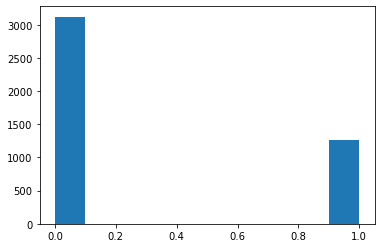

In [14]:
svc = SVC()
svc.fit(Xtrain,ytrain)
ypredS = svc.predict(Xtest)
plt.hist(ypredS)
ypredS

In [15]:
metrics.confusion_matrix(ytest,ypredS)
# TruePositive FalsePositive
# FalseNegative TrueNegative

array([[2504,  429],
       [ 616,  829]], dtype=int64)

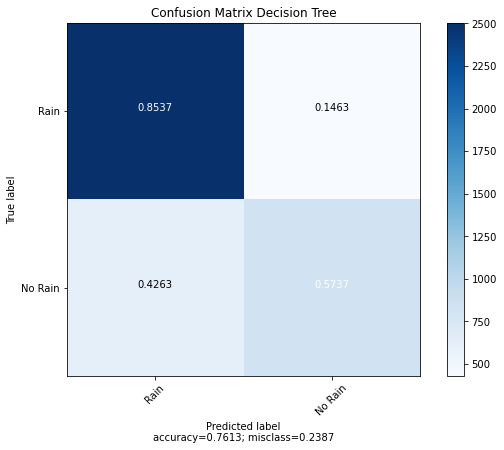

In [16]:
plot_confusion_matrix(cm = metrics.confusion_matrix(ytest, ypredS),normalize=True, target_names = ['Rain', 'No Rain'],title = "Confusion Matrix Decision Tree")

In [17]:
#ilkel score
metrics.accuracy_score(ytest,ypredS)

0.7613065326633166

In [18]:
#final model / tuned
svc = SVC()
svc.fit(XScaletrain,yscaletrain)
ypredscale = svc.predict(XScaletest)

In [19]:
metrics.confusion_matrix(yscaletest,ypredscale)

array([[2910,    0],
       [   1, 1467]], dtype=int64)

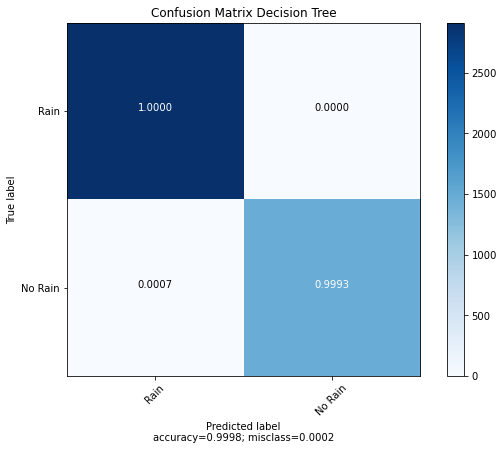

In [20]:
plot_confusion_matrix(cm = metrics.confusion_matrix(yscaletest, ypredscale),normalize=True, target_names = ['Rain', 'No Rain'],title = "Confusion Matrix Decision Tree")

In [21]:
metrics.accuracy_score(yscaletest,ypredscale)

0.9997715851987209